In [9]:
import numpy as np

from utils.loadData import loadDataWithNews
from lstm.preprocessing import dataToTimeSeriesMultiDimensional, getDatasetsMultiDimensionalBaseline, normalizeAtOnce
from lstm.model import getModelBaseline, evaluateModelQuick, evaluateFinal
from lstm.visualization import visualize_loss, show_batch, show_data_simple, showRegressionExampleMultiDimensional
from lstm.callbacks import es_callback, modelckpt_callback

In [10]:
df = loadDataWithNews()

In [11]:
features = df.loc[:, df.columns != 'Date']
features = features.loc[:, features.columns != 'Unnamed: 0']
features = features.loc[:, features.columns != 'Adj Close']
features.head()

,Open,High,Low,Close,Volume,positive,neutral,negative
0,21308.351563,23642.660156,21234.675781,22805.162109,71378606374,2,3,0
1,22806.796875,23238.601563,22399.812500,23137.960938,40387896275,3,2,0
2,23132.865234,24085.855469,22826.472656,23869.832031,38487546580,0,1,0
3,23861.765625,24209.660156,23147.710938,23477.294922,37844228422,1,2,0
4,23474.455078,24059.982422,22159.367188,22803.082031,45852713981,3,3,0


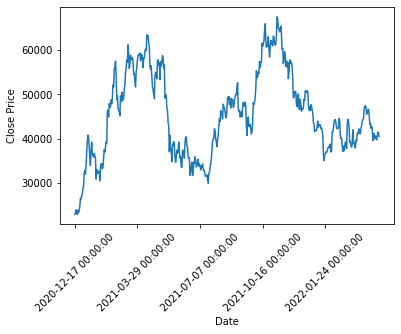

In [12]:
normalized_data, scaler = normalizeAtOnce(features.iloc[:,:-3])
normalized_data = np.concatenate([normalized_data, features.iloc[:,-3:]], axis=1)
show_data_simple(features["Close"], df["Date"])

In [13]:
config = {
    "past": 10,
    "future": 10,
    "neurons": 50,
    "batch_size": 64,
    "epochs": 100,
    "features": normalized_data.shape[1]
}

x_train = normalized_data[:-1]
y_train = normalized_data[1:, 3]
print(x_train.shape, y_train.shape)

(486, 8) (486,)


In [14]:
model = getModelBaseline(config)
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 8)]               0         
                                                                 
 dense_2 (Dense)             (None, 10)                90        
                                                                 
 dropout_1 (Dropout)         (None, 10)                0         
                                                                 
 dense_3 (Dense)             (None, 10)                110       
                                                                 
Total params: 200
Trainable params: 200
Non-trainable params: 0
_________________________________________________________________


Epoch 1/100
1/4 [======>.......................] - ETA: 1s - loss: 1.0066 - rmse: 1.0033 - mae: 0.6962 - mape: 413.4379
Epoch 1: val_loss did not improve from 0.43675
4/4 [==============================] - 1s 74ms/step - loss: 0.9065 - rmse: 0.9521 - mae: 0.6889 - mape: 5794196.0000 - val_loss: 1.7929 - val_rmse: 1.3390 - val_mae: 1.0536 - val_mape: 238.0049
Epoch 2/100
1/4 [======>.......................] - ETA: 0s - loss: 0.8279 - rmse: 0.9099 - mae: 0.6154 - mape: 828.2237
Epoch 2: val_loss did not improve from 0.43675
4/4 [==============================] - 0s 13ms/step - loss: 0.8585 - rmse: 0.9265 - mae: 0.6751 - mape: 5268830.5000 - val_loss: 1.6335 - val_rmse: 1.2781 - val_mae: 1.0029 - val_mape: 226.4374
Epoch 3/100
1/4 [======>.......................] - ETA: 0s - loss: 0.6058 - rmse: 0.7784 - mae: 0.5819 - mape: 21798854.0000
Epoch 3: val_loss did not improve from 0.43675
4/4 [==============================] - 0s 12ms/step - loss: 0.7050 - rmse: 0.8396 - mae: 0.6237 - mape: 71

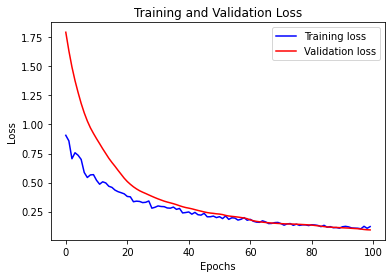

In [15]:
history = model.fit(
    x=x_train,
    y=y_train,
    epochs=config["epochs"],
    validation_split=0.8,
    callbacks=[es_callback, modelckpt_callback],
)
visualize_loss(history)